In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import binom
import pandas as pd
import math
import pickle

## Intervale de confiden≈£ƒÉ T

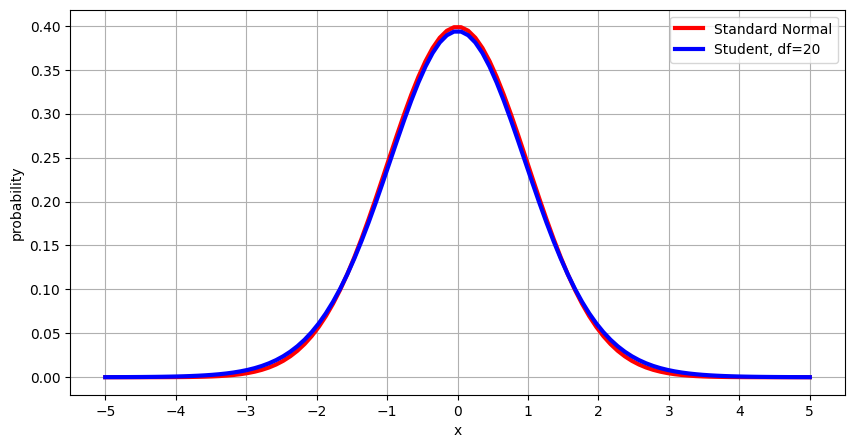

In [3]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y_n = stats.norm.pdf(x, loc=mu, scale=variance)
y_t = stats.t.pdf(x, df=20)

plt.figure(figsize=(10,5))
plt.plot(x, y_n, lw=3, c='r')
plt.plot(x, y_t, lw=3, c='b')
plt.legend(['Standard Normal', 'Student, df=20'])
plt.grid()
plt.xticks(np.linspace(mu-5*sigma, mu+5*sigma, 11))
plt.xlabel('x')
plt.ylabel('probability')
#plt.axvline(x=mu, c='b', linestyle='--')
#[plt.axvline(x=mu_, c='g', linestyle='--') for mu_ in [mu-1, mu+1]]
plt.show()

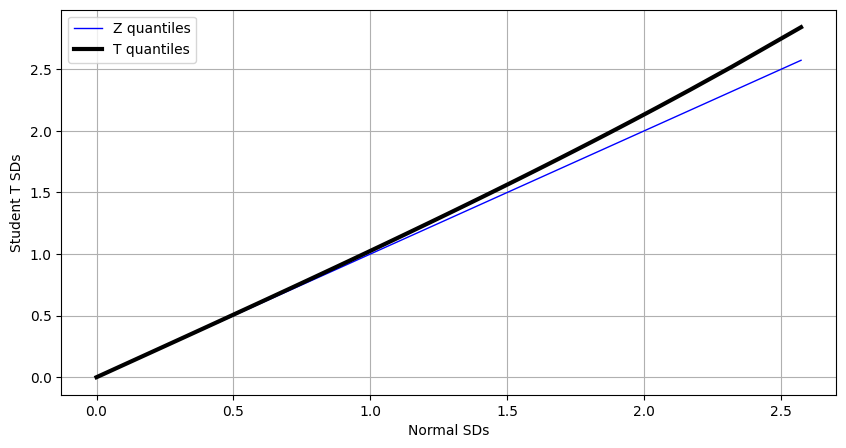

In [4]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
#y_n = stats.norm.pdf(x, loc=mu, scale=variance)
#y_t = stats.t.pdf(x, df=20)
q = np.linspace(0.5, 1.0, 100)
n_q = stats.norm.ppf(q, loc=0, scale=1)
t_q = stats.t.ppf(q, df=20)

plt.figure(figsize=(10,5))
plt.plot(n_q, n_q, lw=1, c='b')
plt.plot(n_q, t_q, lw=3, c='k')
plt.grid()
plt.xticks(np.linspace(0, 2.5, 6))
#plt.yticks(np.linspace(0, 2.5, 6))
plt.legend(['Z quantiles', 'T quantiles'])
plt.xlabel('Normal SDs')
plt.ylabel('Student T SDs')
plt.show()

In [5]:
sleep = pd.read_csv('sleep.csv')
sleep.head()

Unnamed: 0  extra  group  ID
0           1    0.7      1   1
1           2   -1.6      1   2
2           3   -0.2      1   3
3           4   -1.2      1   4
4           5   -0.1      1   5

In [6]:
sleep[sleep.group==1].head()

Unnamed: 0  extra  group  ID
0           1    0.7      1   1
1           2   -1.6      1   2
2           3   -0.2      1   3
3           4   -1.2      1   4
4           5   -0.1      1   5

In [7]:
sleep[sleep.group==2].head()

Unnamed: 0  extra  group  ID
10          11    1.9      2   1
11          12    0.8      2   2
12          13    1.1      2   3
13          14    0.1      2   4
14          15   -0.1      2   5

In [8]:
sleep1 = sleep[sleep.group==1]\
    .set_index('ID')\
    .join(
        sleep[sleep.group==2].set_index('ID'),
        lsuffix='_before',
        rsuffix='_after'
    )
sleep1

Unnamed: 0_before  extra_before  group_before  Unnamed: 0_after  \
ID                                                                    
1                   1           0.7             1                11   
2                   2          -1.6             1                12   
3                   3          -0.2             1                13   
4                   4          -1.2             1                14   
5                   5          -0.1             1                15   
6                   6           3.4             1                16   
7                   7           3.7             1                17   
8                   8           0.8             1                18   
9                   9           0.0             1                19   
10                 10           2.0             1                20   

    extra_after  group_after  
ID                            
1           1.9            2  
2           0.8            2  
3           1.1            2  
4           0.1            2  
5          -0.1            2  
6           4.4            2  
7           5.5            2  
8           1.6            2  
9           4.6            2  
10          3.4            2

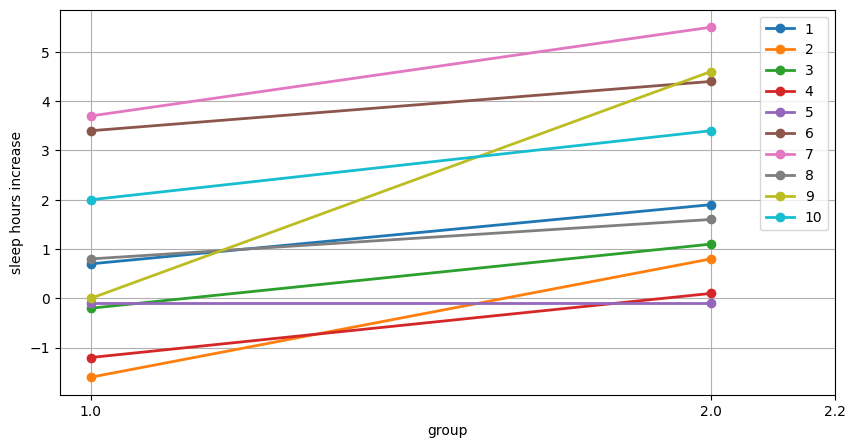

In [9]:
plt.figure(figsize=(10,5))
y1 = sleep1['extra_before'].values
y2 = sleep1['extra_after'].values
x = [1, 2]
ys = [[y1[i], y2[i]] for i in range(len(y1))]
[plt.plot(x, ys[i], marker='o', lw=2) for i in range(len(y1))]
plt.grid()
plt.xlabel('group')
plt.ylabel('sleep hours increase')
plt.legend(range(1,11))
plt.xticks([1, 2, 2.2])
plt.show()

In [10]:
# A/B paired group testing
diff = y2 - y1
m = np.mean(diff); s = np.std(diff)
print(m + np.array([-1, 1]) * stats.t.ppf(0.975, df=9) * s / np.sqrt(10))
print(stats.t.interval(0.95, loc=m, scale=s/np.sqrt(10), df=9))

[0.74526707 2.41473293]
(0.7452670722078104, 2.4147329277921896)


In [11]:
# independent group A/B testing, equal variances
x_oc, s_oc = 132.86, 15.34
x_c, s_c = 127.44, 18.23
n_oc, n_c = 8, 21
sp = np.sqrt( ((n_oc-1)*s_oc**2 + (n_c-1)*s_c**2) / (n_oc+n_c-2) )
print(x_oc - x_c + np.array([-1, 1]) * stats.t.ppf(.975, df=n_oc+n_c-2) \
    * sp * (1/n_oc+1/n_c)**.5)
print(stats.t.interval(
    0.95, 
    loc = x_oc - x_c, 
    scale = sp * (1/n_oc+1/n_c)**.5, 
    df=n_oc+n_c-2
))

[-9.52109748 20.36109748]
(-9.521097483796161, 20.361097483796193)


In [12]:
# independent group A/B testing vs. paired A/B testing
# sleep data
y1 = sleep1['extra_before'].values
y2 = sleep1['extra_after'].values

x_1, s_1 = np.mean(y1), np.std(y1)
x_2, s_2 = np.mean(y2), np.std(y2)
n = len(y1)
sp = np.sqrt( (s_1**2 + s_2**2) / 2 )
print(x_2 - x_1 + np.array([-1, 1]) * stats.t.ppf(.975, df=2*n-2) \
    * sp * np.sqrt(2/n))
print(stats.t.interval(0.95, loc=m, scale=s/np.sqrt(10), df=9))

[-0.1123315  3.2723315]
(0.7452670722078104, 2.4147329277921896)


In [13]:
# independent group A/B testing, unequal variances
# oral contraceptive example
x_oc, s_oc = 132.86, 15.34
x_c, s_c = 127.44, 18.23
n_oc, n_c = 8, 21
df = (s_oc**2/n_oc + s_c**2/n_c)**2 / \
    ( (s_oc**2/n_oc)**2/(n_oc-1) + (s_c**2/n_c)**2/(n_c-1) )
print('df: ', df)
sp = np.sqrt( s_oc**2/n_oc + s_c**2/n_c )
print(x_oc - x_c + np.array([-1, 1]) * stats.t.ppf(.975, df=df) * sp)
print(stats.t.interval(
    0.95,
    loc = x_oc - x_c, 
    scale = np.sqrt(s_oc**2/n_oc + s_c**2/n_c), 
    df=df
))

df:  15.035180011917006
[-8.91332743 19.75332743]
(-8.913327425893712, 19.753327425893744)


## Testarea ipotezei

In [15]:
# paired T test pentru father.son dataset
father_son = pd.read_csv('father_son.csv')
father_son.head()

Unnamed: 0   fheight   sheight
0           1  65.04851  59.77827
1           2  63.25094  63.21404
2           3  64.95532  63.34242
3           4  65.75250  62.79238
4           5  61.13723  64.28113

In [19]:
# calculƒÉm diferen≈£a dintre √ÆnƒÉl≈£imi
fs = father_son['sheight'].values - father_son['fheight'].values

# statistica, (X' - mean_pop)/std_sample/sqrt(sample length)
# atentie la calculul standard error, se face pe n-1, unde 
# n este dimensiunea sample-ului
print((np.mean(fs) - 0)*np.sqrt(len(fs))/np.std(fs, ddof=1))

# folosim paired (related) T test pentru a calcula statistica
# ipoteza H_0 este ca mediile celor doua populatii sa nu difere
print(stats.ttest_rel(
    father_son['sheight'].values, 
    father_son['fheight'].values\
).statistic)

# alternativ avem si one sample T test, specificam media populatiei
# ipoteza H_0 este ca media diferentelor sa fie 0
print(stats.ttest_1samp(
    father_son['sheight'].values - father_son['fheight'].values,
    popmean=0
).statistic)

11.78854903823701
11.788549038237012
11.788549038237012


In [20]:
# pentru ipoteza H_0, dacƒÉ ea e adevarata (diferenta e zero),
# √Æn 95% din cazuri media va fi sub 1.1629
print(stats.t.ppf(0.975, loc=np.mean(fs), scale=np.std(fs, ddof=1)/np.sqrt(len(fs)), df=len(fs)-1))

# putem calcula si intevalul T de confidenta 95% pentru media populatiei:
print(stats.t.interval(
    0.95, 
    loc = np.mean(fs), 
    scale = np.std(fs, ddof=1)/np.sqrt(len(fs)), 
    df=len(fs)-1
))

# se vede ca:
# 1) satistica 11.78 > 1.629, rejectam H_0
# 2) zero nu intra in acest interval
# 3) df = 1077, distributia e aproape normala

1.1629159618027085
(0.8310296226128758, 1.1629159618027085)


In [21]:
# rata de evenimente respiratorii revizitata
print('statistic: ', (32 - 30)*np.sqrt(16)/10)
print('95% percentile:', stats.t.ppf(0.95, df=15))
print('reject H_0' 
      if (32 - 30)*np.sqrt(16)/10 > stats.t.ppf(0.95, df=15) 
      else 'fail to reject H_0'
)
print('verificare: media poate fi in intevalul\n\t',
    stats.t.interval(
        0.95, 
        loc = 30, 
        scale = 32/np.sqrt(16), 
        df=15
    )
)

statistic:  0.8
95% percentile: 1.7530503556925547
fail to reject H_0
verificare: media poate fi in intevalul
	 (12.948403635525416, 47.051596364474584)


In [22]:
# oral contraceptive example - independent test,unequal variances
x_oc, s_oc, n_oc = 132.86, 15.34, 8
x_c, s_c, n_c = 127.44, 18.23, 21
df = (s_oc**2/n_oc + s_c**2/n_c)**2 / \
    ( (s_oc**2/n_oc)**2/(n_oc-1) + (s_c**2/n_c)**2/(n_c-1) )
sp = np.sqrt( s_oc**2/n_oc + s_c**2/n_c )

statistic = stats.ttest_ind_from_stats(
    x_oc, s_oc, n_oc, x_c, s_c, n_c, equal_var=False).statistic
print('df: ', df) ; print('statistic: ', statistic)
percentile = stats.t.ppf(0.95, df=df)
print('95% percentile:', percentile)
print('reject H_0' if statistic > percentile else 'fail to reject H_0')
print('T confidence interval: ', stats.t.interval(
    0.95, loc = x_oc - x_c, scale = np.sqrt(s_oc**2/n_oc + s_c**2/n_c), df=df
))
print('two group population mean: ', 0)

df:  15.035180011917006
statistic:  0.805821448286547
95% percentile: 1.7527810366681962
fail to reject H_0
T confidence interval:  (-8.913327425893712, 19.753327425893744)
two group population mean:  0


ReluƒÉm problema cu acel prieten care are 8 copii, din care 7 sunt fete ≈üi nici unele gemene. 

Realiza≈£i testarea ipotezei $H_0$ : p = 0.5, $H_a$ : p > 0.5

Care este regiunea de rejectare relevantƒÉ astfel ca probabilitatea de rejectare este mai micƒÉ dec√¢t 5% ?

CƒÉutƒÉm probabilitatea, consider√¢nd $H_0$ adevƒÉratƒÉ, ca cuplul sƒÉ aibƒÉ 7 sau mai multe fete.

In [23]:
print(pd.DataFrame(list(zip(
    ['[%d : 8]' % i for i in range(0, 9)],
    [round(1 - stats.binom.cdf(i-1, n=8, p=0.5), 4) for i in range(0, 9)]
)), columns=['Rejection Region', 'Type I Error Rate']))

  Rejection Region  Type I Error Rate
0          [0 : 8]             1.0000
1          [1 : 8]             0.9961
2          [2 : 8]             0.9648
3          [3 : 8]             0.8555
4          [4 : 8]             0.6367
5          [5 : 8]             0.3633
6          [6 : 8]             0.1445
7          [7 : 8]             0.0352
8          [8 : 8]             0.0039


Probabilitatea de rejec≈£ie scade sub 5% doar pentru ultimele douƒÉ tuple.

## P-values

In [24]:
1 - stats.t.cdf(2.5, df=15)

0.012252901623256984

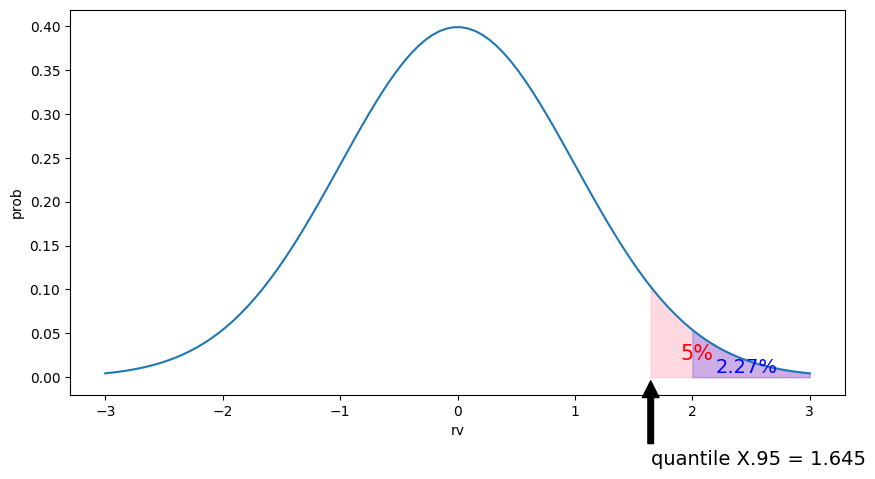

0.02275013194817921

In [25]:
# attained significance level
x = np.linspace(-3, 3, 100)
x1 = np.linspace(1.645, 3, 100)
x2 = np.linspace(2.0, 3, 100)
plt.figure(figsize=(10,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('rv')
plt.ylabel('prob')
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="pink", alpha=0.6)
plt.annotate('5%', xy=(1.9, 0.02), color='r', fontsize=15)
plt.annotate('quantile X.95 = 1.645', 
            xy=(1.645, 0), xytext=(1.645, -.1), fontsize=14, 
            arrowprops = dict(facecolor='black', shrink=0.05))
plt.fill_between(x2, stats.norm.pdf(x2, mu, sigma), color="blue", alpha=0.2)
plt.annotate('2.27%', xy=(2.2, 0.005), color='b', fontsize=14)
plt.show()

1 - stats.norm.cdf(2.0, loc=mu, scale=sigma)

In [26]:
# 7 fete din 8 revisited
print(1 - stats.binom.cdf(6, n=8, p=0.5))
print(stats.binomtest(7, n=8, p=0.5, alternative='greater'))

0.03515625
BinomTestResult(k=7, n=8, alternative='greater', statistic=0.875, pvalue=0.03515625)


In [27]:
print(stats.binomtest(7, n=8, p=0.5, alternative='two-sided'))
print(2*stats.binomtest(7, n=8, p=0.5, alternative='greater').pvalue)

BinomTestResult(k=7, n=8, alternative='two-sided', statistic=0.875, pvalue=0.0703125)
0.0703125


In [28]:
# infection rate
# distributiile discrete ne dau P(X <= x), de aceea luam de la 9
# avem nevoie de survival function pentru ca e upper tail
1 - stats.poisson.cdf(9, mu=0.05 * 100)

0.03182805730620486

## Laborator: probleme rezolvate

Pentru problemele de calcul, rezolva≈£i pe c√¢t posibil folosind cel pu≈£in douƒÉ metode, ca sƒÉ vƒÉ pute≈£i verifica.

__Exemplu1__. Rata de omoruri √Æn Sco≈£ia a scƒÉzut anul trecut la 99, de la 115 √Æn anul anterior. Este acest anun≈£ demn de pomenit √Æn ziar? (Calcula≈£i intervalul de confiden≈£ƒÉ 95% pentru aceastƒÉ medie).

NumƒÉrul actual de crime variazƒÉ de la an la an. DacƒÉ presupunem cƒÉ fiecare este un eveniment independent, atunci putem modela aceastƒÉ ratƒÉ ca o distribu≈£ie Poisson.

In [29]:
# https://www.macs.hw.ac.uk/~rc141/f78sc/notes07.pdf
# vedeti tot materialul de aici, este absolut digerabil

# determinam intervalul de confidenta 95% pentru distributia Poisson cu media populatiei 115.
# media sample-ului e de asteptat ca in 95% din cazuri sa fie intre aceste valori
print('intervalul de confidenta 95%: ', stats.poisson.interval(0.95, mu=115))

# calculam si P-value asociat acestei valori considerate extreme
print('P-value asociat valorii 99: ', stats.poisson.cdf(99, mu=115))

# verificare: daca 94 este valoarea ratei, sub aceasta rata trebuie sa gasim 2.5% din masa distributiei
print('masa distributiei sub 94: ', stats.poisson.cdf(94, mu=115))

intervalul de confidenta 95%:  (94.0, 136.0)
P-value asociat valorii 99:  0.07161185852455393
masa distributiei sub 94:  0.025170549543045425


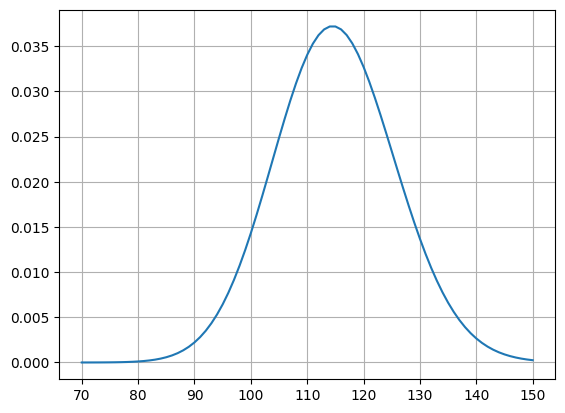

In [30]:
x = np.linspace(70, 150, 81)
y = stats.poisson.pmf(x, mu=115)
plt.plot(x, y)
plt.grid() ; plt.show()

Ceva cu adevƒÉrat interesant ar fi fost dacƒÉ rata crimelor ar fi scƒÉzut sub 94 pe an, altfel, se √ÆncadreazƒÉ √Æn varia≈£ia previzibilƒÉ. Vedem cƒÉ aceastƒÉ concluzie este indicatƒÉ de douƒÉ lucruri:
* valoarea 'record' de 99 este √Æn intervalul de confiden≈£ƒÉ, deci previzibilƒÉ;
* P-value este peste 5% si vrem sa fie sub, ca sƒÉ considerƒÉm apari≈£ia unui eveniment extrem.

__Exemplu2__. Un contor Geiger √ÆnregistreazƒÉ 100 de √ÆnjumƒÉtƒÉ≈£iri radioactive √Æn 5 minute. GƒÉsi≈£i intervalul de confiden≈£ƒÉ 95% pentru numƒÉrul de √ÆnjumƒÉtƒÉ≈£iri pe orƒÉ.

In [31]:
# R. https://www.macs.hw.ac.uk/~rc141/f78sc/notes07.pdf
print(np.array(stats.poisson.interval(0.95, mu=100)) * 12)
print(12 * (100 + np.array([-1, 1]) * stats.norm.ppf(0.975) * np.sqrt(100)))
print("quantila 0.975: ", stats.poisson.ppf(0.975, mu=100) * 12)

[ 972. 1440.]
[ 964.80432186 1435.19567814]
quantila 0.975:  1440.0


__Exemplu3__. Presupunem cƒÉ devia≈£ia standard a 9 perechi de diferen≈£e este 1. Care ar fi valoarea mediei diferen≈£elor astfel ca punctul inferior a intervalului de confiden≈£ƒÉ 95% Student T atinge 0?

In [32]:
mu = stats.t.ppf(0.975, df=8)*1/np.sqrt(9) ; print(mu)

# verificare:
stats.t.interval(0.95, loc=mu, scale=1/np.sqrt(9),df=8)

0.7686680450111235


(1.1102230246251565e-16, 1.5373360900222468)

## Laborator: exerci≈£ii ≈üi probleme

__Q1__. $\bar{X}$ ≈üi $\bar{Y}$ sunt calculate ca medii ale $n$ variabile aleatoare iid provenind din distribu≈£iile cu medii $\mu_x$ ≈üi respectiv $\mu_y$, √ÆnsƒÉ av√¢nd aceea≈üi dispersie $\sigma^2$. Care este dispersia (variance) pentru variabila aleatoare $\bar{X} - \bar{Y}$ ?

R. Folosim mai √Ænt√¢i urmƒÉtoarea rela≈£ie:

$Var[X_i - Y_i]$

$= E[(X_i - Y_i)^2] - E^2[X_i - Y_i] = ... $

In [33]:
#iid=independente »ôi identic distribuite
#deci ùê∏(ùëãùëñùëåùëñ) = ùê∏(ùëãùëñ)ùê∏(ùëåùëñ) = ùúåùúáùë•ùúáùë¶ = ùúåùúá2 
#p=coeficientul de corelatie
#ùúå = ùúåùëãùëå = ùúåùëåùëã 

#ùëâùëéùëü[ùëãùëñ‚àíùëåùëñ] = ùê∏[(ùëãùëñ‚àíùëåùëñ)^2]‚àíùê∏^2[ùëãùëñ‚àíùëåùëñ]
#           = ùê∏[ùëãùëñ^2 + ùëåùëñ^2 - 2Eùëãùëñùëåùëñ] - [ùê∏(ùëãùëñ) - ùê∏(ùëåùëñ)]^2
#           =ùê∏(ùëãùëñ^2)  + ùê∏(ùëåùëñ^2) - 2Eùëãùëñùëåùëñ]  - [ùê∏(ùëãùëñ)]^2 +2ùê∏(ùëãùëñ)ùê∏(ùëåùëñ) - [ùê∏(ùëåùëñ)]^2
#           = ùê∏(ùëãùëñ^2)+ ùê∏(ùëåùëñ^2)- [ùê∏(ùëãùëñ)]^2- [ùê∏(ùëåùëñ)]^2
#           = ùúé^2 + ùúé^2=2ùúé^2


#ùëâùëéùëü[ùëã¬Ø‚àíùëå¬Ø]= ùëâùëéùëü[1/ùëõ ‚àë(ùëãùëñ‚àíùëåùëñ)]= (1/ùëõ^2) ùëâùëéùëü[‚àë(ùëãùëñ‚àíùëåùëñ)]= (1/ùëõ^2) ‚àëùëâùëéùëü[ùëãùëñ‚àíùëåùëñ]= (1/ùëõ^2) ùëõ(2ùúé^2)= (2ùúé^2)/ùëõ

print("Dispersia (variance) pentru variabila aleatoare ùëã¬Ø‚àíùëå¬Ø este (2*ùúé^2‚àí2*ùúåùúé^2)/ùëõ.")

Dispersia (variance) pentru variabila aleatoare ùëã¬Ø‚àíùëå¬Ø este (2*ùúé^2‚àí2*ùúåùúé^2)/ùëõ.


 __Q2__. O variabilƒÉ aleatoare ia valoarea -4 cu probabilitatea .2 ≈üi respectiv valoarea 1 cu probabilitatea 0.8. Care sunt media ≈üi dispersia acestei variabile aleatoare?
 
R. 

In [49]:
x1 = -4
x2 = 1
p1 = 0.2
p2 = 0.8

mean = p1 * x1 + p2 * x2 #valoarea asteptata
print("Media este:", mean)

variance = p1 * (x1 - mean)**2 + p2 * (x2 - mean)**2 
print("Dispersia este:", variance)


Media este: 0.0
Dispersia este: 4.0


__Q3__. ConsiderƒÉm urmƒÉtoarea PMF pentru o variabilƒÉ aleatoare:
p = \[.1, .2, .3, .4\]
x = range(2 : 6)

Care este dispersia variabilei aleatoare?

R. 

In [50]:
import numpy as np

#PMF - descrie distributia de probabilitate a unei variabile aleatoare discrete

p = np.array([.1, .2, .3, .4])
assert p.sum() == 1.

x = range(2, 6)
print([num for num in x])

mean = np.sum(p * x)
variance = np.sum(p * (x - mean)**2)
print(f'mean: {mean}')
print(f'dispersia: {variance}')

[2, 3, 4, 5]
mean: 4.0
dispersia: 1.0


__Q4__. Presupunem cƒÉ numƒÉrul de accesƒÉri web pentru un anume site are o distribu≈£ie aproximativ normalƒÉ de medie 100 de accesƒÉri pe zi ≈üi devia≈£ie standard 10 accesƒÉri pe zi. Care este probabilitatea ca √Æntr-o zi sƒÉ avem mai pu≈£in de 93 accesƒÉri, exprimatƒÉ ca procent?

In [51]:
from scipy.stats import norm
#formula pentru Z(c√¢t de departe se aflƒÉ o observa»õie (X) de media popula»õiei (Œº) √Æn unitƒÉ»õi de devia»õie standard (œÉ))
#Z = (X - Œº) / œÉ
#Z = (93 - 100) / 10 = -0.7
media = 100
deviatie_standard = 10
valoare = 93

#
probabilitate = norm.cdf((valoare - media) / deviatie_standard)

print(f"Probabilitatea de a avea mai pu»õin de {valoare} accesƒÉri √Æntr-o zi este de {probabilitate:.2%}")


Probabilitatea de a avea mai pu»õin de 93 accesƒÉri √Æntr-o zi este de 24.20%


__Q5__. Ave≈£i un prieten care pretinde cƒÉ poate discerne un vin bun de unul ieftin doar dupƒÉ gust. Deoarece nu √Æl crede≈£i, decide≈£i sƒÉ-l supune≈£i unui test. Presupun√¢nd cƒÉ ave≈£i dreptate, √Æntr-un test dublu orb unde randomiza≈£i 6 perechi de varietƒÉ≈£i (Merlot, Sauvignon, ...) de vin ieftin ≈üi respectiv vin scump. Care este ≈üansa ca el sƒÉ ghiceascƒÉ, la √Ænt√¢mplare, 5 sau 6 corect?

In [52]:
# R. 
#test dublu orb-ca la placebo: de ales una dintre 2 sticle, deci 0.5 probabilitatea de a ghici corect

from scipy.stats import binom

p = 0.5 
n = 6  #nr perechi
k = [5, 6]  # 5 sau 6 raspunsuri corecte

#am aplicat formula pentru distributia binomiala, care ne da probabilitatea de a avea i raspunsuri corecte din n incercari
P_5_or_6 = sum([binom.pmf(i, n, p) for i in k])

print(f"»òansa de a ghici cel pu»õin 5 corect este: {P_5_or_6:.2%}")



»òansa de a ghici cel pu»õin 5 corect este: 10.94%


__Q6__. NumƒÉrul de accesƒÉri web este distribuit Poisson cu o medie de 16.5 accesƒÉri zilnice. Care este probabilitatea de a ob≈£ine 20 sau mai pu≈£ine √Æn 2 zile?

In [55]:
from scipy.stats import poisson

media = 16.5 * 2  # media pentru 2 zile
prob = poisson.cdf(k=20, mu=media) 

print("Probabilitatea este ",prob)


Probabilitatea este  0.010453906317688662


__Q7__. ConsiderƒÉm dataset-ul father.son. Folosind CLT ≈üi presupun√¢nd cƒÉ ta≈£ii sunt un sample random din popula≈£ie, care este intervalul de confiden≈£ƒÉ 95% pentru media √ÆnƒÉl≈£imii lor?

In [57]:
#CLT - Central Limit Theorem
#teorema limitei centrale afirmƒÉ cƒÉ distribu»õia mediei aritmetice a unui numƒÉr mare de variabile aleatoare independente »ôi identic distribuite 
#va fi aproximativ o distribu»õie normalƒÉ, indiferent de distribu»õia ini»õialƒÉ a variabilelor aleatoare.

import pandas as pd
import numpy as np
from scipy import stats

father_son = pd.read_csv('father_son.csv')

x = father_son['fheight'].values #√ÆnƒÉl»õimea ta»õilor extrasa din setul de date

x_bar = np.mean(x)  #media √ÆnƒÉl»õimii ta»õilor
s = np.std(x, ddof=1) #devia»õia standard a √ÆnƒÉl»õimii ta»õilor la care se adaugƒÉ un grad de libertate, deoarece este un sample »ôi nu popula»õie:
#corectia ddof=1 schimba formula de calcul a devia»õiei standard (numitorul devine n-1 √Æn loc de n) pt a evita subestimarea variabilitƒÉ»õii popula»õiei(bias)

n = len(x) #dimensiunea sample-ului
se = s / np.sqrt(n)  #eroarea standard a mediei √ÆnƒÉl»õimii ta»õilor

#un interval de confidenta se calculeaza ca fiind media plus sau minus cuantila * eroarea standard

#nivelul de semnificatie = probabilitatea de a face o eroare de tip I, adicƒÉ probabilitatea 
#de a respinge gre»ôit o ipotezƒÉ nulƒÉ(de a spune cƒÉ existƒÉ o diferen»õƒÉ c√¢nd de fapt nu existƒÉ)
alpha = 0.05 #conven»õia comunƒÉ este 0.05(rata de eroare de tip I), deci avem 95% nivel de confidenta
z = stats.norm.ppf(1 - alpha/2) #z este cuantila normalƒÉ corespunzƒÉtoare nivelului de semnifica»õie. 
#am folosit alpha/2 deoarece distribu»õia normalƒÉ este simetricƒÉ √Æn jurul mediei 
#print( x_bar + np.array([-1, 1]) * z * se) #intervalul de confidenta
print(f"Intervalul de confiden»õƒÉ la 95% pentru media √ÆnƒÉl»õimii ta»õilor este ") 
print(stats.norm.interval(1 - alpha, loc=x_bar, scale=se)) #intervalul de confidenta - limita inferioara si superioara

Intervalul de confiden»õƒÉ la 95% pentru media √ÆnƒÉl»õimii ta»õilor este 
(67.52324166014765, 67.85095206898038)


__Q8__. ConsiderƒÉm o distribu≈£ie uniformƒÉ. Extragem 100 de valori din aceastƒÉ distribu≈£ie uniformƒÉ cu medie 0.5 ≈üi dispersie 1/12 ≈üi calculƒÉm media lor $\bar{X}$. Care este probabilitatea de a ob≈£ine o medie mai mare sau egalƒÉ cu 0.51?

In [58]:
import numpy as np

sd = np.sqrt(1/12) / np.sqrt(100) #standard error, folosita pentru a calcula z-score

z = (0.51 - 0.5) / sd #z-score, folosit pentru a calcula probabilitatea de a obtine o medie mai mare sau egala cu 0.51 

prob = 1 - stats.norm.cdf(z) 

print("Probabilitatea de a ob≈£ine o medie mai mare sau egalƒÉ cu 0.51 este:", prob)


Probabilitatea de a ob≈£ine o medie mai mare sau egalƒÉ cu 0.51 este: 0.36451724476940184


__Q9__. Rata de accesƒÉri a unui site web este de 10 pe minut, monitorizatƒÉ timp de o orƒÉ. Care este intervalul de confiden≈£ƒÉ Poisson a ratei de evenimente pe minut?

In [41]:
import numpy as np
import scipy.stats as stats

#10*60 = 600 media de evenimente pe ora
print(np.array(list(stats.poisson.interval(0.95, mu=600)))/60)# deci suntem 95% siguri ca media este intre 9.2 si 10.8


[ 9.2 10.8]


__Q10__. ConsiderƒÉm datasetul mtcars. Construi≈£i intervalul T de confiden≈£ƒÉ 95% pentru MPG (miles per gallon) compar√¢nd ma≈üinile cu 4 respectiv 6 cilindri (diferen≈£a: setul 4 - setul 6), presupun√¢nd aceea≈üi dispersie √Æn cele douƒÉ grupuri.

Observ√¢nd intervalul de confiden≈£ƒÉ, ce concluziona≈£i cu privire la consum?

In [42]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [59]:
x4, x6 = tuple([mtcars[mtcars.cyl == i]['mpg'].values for i in [4, 6]]) #ma»ôinile cu 4 »ôi respectiv 6 cilindri
print('x4: ', x4)
print('x6: ', x6)

x4, x6 = tuple([mtcars[mtcars.cyl == i]['mpg'].values for i in [4, 6]])
print('x4: ', x4)
print('x6: ', x6)

x_oc, s_oc, n_oc = x4.mean(), x4.std(), len(x4) #media, devia»õia standard »ôi dimensiunea sample-ului pentru ma»ôinile cu 4 cilindri
x_c, s_c, n_c = x6.mean(), x6.std(), len(x6) #media, devia»õia standard »ôi dimensiunea sample-ului pentru ma»ôinile cu 6 cilindri
print(x_oc, s_oc, n_oc)
print(x_c, s_c, n_c)

#calculam deviatia standard combinata a celor doua sample-uri folosind formula: sqrt(((n1-1)*s1^2 + (n2-1)*s2^2) / (n1+n2-2))
sp = np.sqrt(((n_oc - 1) * s_oc**2 + (n_c - 1) * s_c**2) / (n_oc + n_c - 2)) #pooled standard deviation, adica deviatia standard combinata a celor doua sample-uri 
print('sp:', sp)
print(x_oc - x_c + np.array([-1, 1]) * stats.norm.ppf(0.975) * sp * np.sqrt(1/n_oc + 1/n_c)) #intervalul de confidenta pentru media populatiei folosind distributia normala
print(stats.t.interval(0.95, loc = x_oc - x_c, scale = sp * np.sqrt(1/n_oc + 1/n_c), df = n_oc + n_c - 2)) #intervalul de confidenta pentru media populatiei folosind distributia t(t-student)

# o medie 0 √Æntre cele douƒÉ grupuri este in afara intervalului, 
# ceea ce inseamna ca grupul cu 4 cilindri consuma mai mult
print(x4.std(), np.std(x4))


x4:  [22.8 24.4 22.8 32.4 30.4 33.9 21.5 27.3 26.  30.4 21.4]
x6:  [21.  21.  21.4 18.1 19.2 17.8 19.7]
x4:  [22.8 24.4 22.8 32.4 30.4 33.9 21.5 27.3 26.  30.4 21.4]
x6:  [21.  21.  21.4 18.1 19.2 17.8 19.7]
26.66363636363636 4.299951950529157 11
19.74285714285714 1.3457415829806494 7
sp: 3.497874267122592
[ 3.60608726 10.23547119]
(3.335594433613969, 10.50596400794447)
4.299951950529157 4.299951950529157


__Q11__. ConsiderƒÉm din nou datasetul mtcars. Folosi≈£i un two group T test pentru a testa ipoteza cƒÉ cele douƒÉ grupuri de ma≈üini cu 4 respectiv 6 cilindri au acela≈üi consum MPG. Folosi≈£i un test two sided cu dispersii diferite. Da≈£i P-value pentru acest two sided test.

In [62]:
x4, x6 = tuple([mtcars[mtcars.cyl == i]['mpg'].values for i in [4, 6]])
print('x4: ', x4)
print('x6: ', x6)

# independent group A/B testing
x_oc, s_oc, n_oc = x4.mean(), x4.std(), len(x4)
x_c, s_c, n_c = x6.mean(), x6.std(), len(x6)
df = n_oc + n_c - 2 #degrees of freedom folosite pentru distributia t
sp = np.sqrt(((n_oc - 1) * s_oc**2 + (n_c - 1) * s_c**2) / (n_oc + n_c - 2)) #pooled standard deviation, adica deviatia standard combinata a celor doua sample-uri
print('df:', df)
print('pooled std:', sp) 
print('confidence interval: ', x_oc - x_c + np.array([-1, 1]) * stats.t.ppf(0.975, df=df) * sp * np.sqrt(1/n_oc + 1/n_c)) #intervalul de confidenta pentru media populatiei folosind distributia t(t-student)

#p-value este 0(calculat ca 2*stats.ttest_ind_from_stats(x_oc, s_oc, n_oc, x_c, s_c, n_c, equal_var=False).pvalue),
# deci rejectam ipoteza nula, ceea ce inseamna ca exista o diferenta semnificativa intre cele doua grupuri
#ipoteza nula inseamna ca nu exista o diferenta intre cele doua grupuri

x4:  [22.8 24.4 22.8 32.4 30.4 33.9 21.5 27.3 26.  30.4 21.4]
x6:  [21.  21.  21.4 18.1 19.2 17.8 19.7]
df: 16
pooled std: 3.497874267122592
confidence interval:  [ 3.33559443 10.50596401]
0.0005360055164682058


__Q12__. Un site web a fost monitorizat pentru un an ≈üi a primit 520 vizite pe zi. √én primele 30 de zile ale anului urmƒÉtor, site-ul a primit 15800 vizite. Presupun√¢nd cƒÉ vizitele au o distribu≈£ie Poisson, da≈£i P-value pentru testul one sided pentru ipoteza cƒÉ vizitele au sporit fa≈£ƒÉ de anul trecut. Este rejectatƒÉ $H_0$? Verifica≈£i concluzia, calcul√Ænd ≈üi intervalul de confiden≈£ƒÉ.

In [64]:
r1, r2 = 520, 15800 / 30 #ratele de evenimente pentru cele douƒÉ grupuri 
print(r1, r2)
print('intervalul: ', np.array([r1, r2]) + np.array([-1, 1]) * stats.norm.ppf(0.975) * np.sqrt(r1 + r2)) #intervalul de confidenta pentru rata de evenimente folosind distributia normala
print('P-value: ', stats.poisson.cdf(520, mu=15800/30)) #P-value pentru rata de evenimente folosind distributia Poisson 
#P-value inseamna probabilitatea de a obtine un rezultat mai extrem decat cel observat, daca ipoteza nula este adevarata(aceasta este probabilitatea
# de a obtine 520 sau mai putine evenimente in 30 de zile, daca rata de evenimente este 520)

#nu se poate respinge ipoteza nulƒÉ H0 la un nivel de semnifica»õie alfa = 0.05 (se folose≈üte func≈£ia stats.norm.ppf(0.975)), deoarece P-value este mai mare dec√¢t alfa.
# nu exista o diferenta semnificativa intre cele doua grupuri

520 526.6666666666666
intervalul:  [456.59079799 590.07586867]
P-value:  0.39667696806906916


__Q13__. Presupunem cƒÉ facem un test randomizat, dublu orb, cu 18 subiec≈£i obezi. 9 dintre ei primesc o pastilƒÉ de slƒÉbit iar 9 primesc placebo. Indicele de masƒÉ corporalƒÉ (BMI, Body Mass Index) a fost mƒÉsurat ca baseline ≈üi apoi √Æn timpul tratamentului, pentru 4 sƒÉptƒÉm√¢ni. Diferen≈£a fa≈£ƒÉ de baseline (followup - baseline) a fost 3 $kg/m^2$ pentru grupul tratat ≈üi 1 $kg/m^2$ pentru grupul placebo. Devia≈£iile standard ale diferen≈£elor au fost de 1.5 $kg/m^2$ pentru grupul tratat ≈üi 1.8 $kg/m^2$ pentru grupul placebo. Studiul dore≈üte sƒÉ afle dacƒÉ schimbarea BMI dupƒÉ 4 saptƒÉm√¢ni este diferitƒÉ √Æntre grupul tratat ≈üi grupul placebo. 

Calcula≈£i pooled variance ≈üi realiza≈£i intervalul de confiden≈£ƒÉ. Realiza≈£i apoi two sided test, verific√¢nd ipoteza nulƒÉ cƒÉ mediile √Æntre grupuri nu diferƒÉ. Porni≈£i de la definirea $H_0$ ≈üi $H_a$ ≈üi calcula≈£i statistica T pentru intervalul 95%, √Æn douƒÉ feluri ca sƒÉ vƒÉ verifica≈£i. Calcula≈£i ≈üi P-value. Ce concluzie trage≈£i?

In [47]:
x_oc, s_oc = 2, np.sqrt(((9-1)*(1.5)**2 + (9-1)*(1.8)**2)/(18-2)) #media si deviatia standard pentru grupul tratat
x_c, s_c =-2, np.sqrt(((9-1)*(1.5)**2 + (9-1)*(1.8)**2)/(18-2)) # media si deviatia standard pentru grupul placebo
n_oc, n_c = 18,18 #dimensiunea sample-ului pentru fiecare grup
df =n_oc + n_c - 2 #degrees of freedom
print('df: ', df)

sp = np.sqrt(((n_oc-1)*(s_oc)**2 + (n_c-1)*(s_c)**2)/df) #pooled standard deviation, adica deviatia standard combinata a celor doua sample-uri
print('pooled std: ', sp)
print('confidence interval for difference: ', stats.t.interval(
0.95,
loc = x_oc - x_c,
scale = sp * np.sqrt(1/n_oc + 1/n_c),
df=df
)) #intervalul de confidenta pentru diferenta dintre cele doua grupuri folosind distributia t(t-student)
print('checkup: ', stats.t.interval( #verificare
0.95,
loc = np.mean([x_oc, x_c]),
scale = sp * np.sqrt(1/n_oc + 1/n_c),
df=df
))

#p-value este 0(calculat ca 2*(1 - stats.t.cdf(abs(t1), df)), deci rejectam ipoteza nula, ceea ce inseamna ca exista o diferenta semnificativa intre cele doua grupuri

t1 = (x_oc - x_c) / (sp * np.sqrt(1/n_oc + 1/n_c)) #statistica t pentru ipoteza nula(H0)
t2 = -t1 #statistica t pentru ipoteza alternativa(H1)

t_crit = stats.t.ppf(0.025, df) #cuantila t pentru nivelul de semnificatie alfa = 0.05
pval = 2 * (1 - stats.t.cdf(abs(t1), df)) #P-value pentru testul t

print('t1:', t1)
print('t2:', t2)
print('t_crit:', t_crit)
print('pval:', pval)

if pval < 0.05:
    print('Respingerem ipoteza nula. Exista o diferenta semnificativa intre cele doua grupuri.')
else:
    print('Acceptam ipoteza nula. Nu exista o diferenta semnificativa intre cele doua grupuri.')


df:  34
pooled std:  1.6568041525780892
confidence interval for difference:  (2.8776562859694614, 5.122343714030539)
checkup:  (-1.1223437140305388, 1.1223437140305388)
t1: 7.242859683401482
t2: -7.242859683401482
t_crit: -2.032244509317719
pval: 2.2047369929723004e-08
Respingerem ipoteza nula. Exista o diferenta semnificativa intre cele doua grupuri.


__Q14.__ Ave≈£i o monedƒÉ ≈üi suspecta≈£i cƒÉ este biased, cƒÉ dƒÉ mai multe Heads dec√¢t Tails. Ob≈£ine≈£i 55 Heads din 100 de aruncƒÉri. Da≈£i valoarea exactƒÉ P-value pentru ipoteza ca moneda sƒÉ fie non-biased (fair). C√¢te aruncƒÉri din 100 trebuie sƒÉ iasƒÉ Heads ca sƒÉ √Æncepe≈£i sƒÉ ave≈£i suspiciuni √Æntemeiate (95% confiden≈£ƒÉ)?

In [65]:
#testul binomial
from cmath import sqrt

n = 100 #numarul de aruncari
k = 55 #numarul de Heads
p = 0.5 #probabilitatea de a obtine Heads

p_value = 1 - binom.cdf(k-1, n, p) + binom.pmf(k, n, p) #P-value pentru testul binomial
print("P-value:", p_value) #P-value este 0.027, deci rejectam ipoteza nula, ceea ce inseamna ca moneda nu este biased
#probabilitate ca moneda sƒÉ fie non-biased
p = 0.55
n = 100
z = norm.ppf(0.975) #cuantila normala pentru nivelul de semnificatie alfa = 0.05

w = z * sqrt(p*(1-p)/n + z*z/(4*n*n)) #width al intervalului de incredere Wilson pentru probabilitatea p     
ci_low = p - w #limita inferioara a intervalului de incredere Wilson
ci_high = p + w #limita superioara a intervalului de incredere Wilson

print("Intervalul de incredere Wilson:", ci_low*100, ci_high*100)
#trebuie sƒÉ ob»õinem cel pu»õin 65 de Heads √Æn 100 de aruncƒÉri.
#https://www.statisticshowto.com/wilson-ci/
#Intervalul de √Æncredere Wilson este o metodƒÉ statisticƒÉ pentru calcularea unui interval de confiden»õƒÉ
#pentru propor»õia unei popula»õii √Æn baza unei e»ôantioane. Intervalul de √Æncredere Wilson oferƒÉ un
#interval de confiden»õƒÉ asimetric √Æn jurul propor»õiei e»ôantionului, care are avantajul de a fi mai precis
#dec√¢t intervalul de confiden»õƒÉ binomial tradi»õional pentru propor»õii apropiate de 0 sau 1.

P-value: 0.2325751052897786
Intervalul de incredere Wilson: (45.06192637982835+0j) (64.93807362017165+0j)
